# QUESTION 1

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file1 = pd.read_csv("https://raw.githubusercontent.com/krittikaiitb/2021_convener_selection/main/Dataset_Q1.csv")

In [4]:
print (file1)

   #Sr.No. Name  Roll Number Have you attended Krittika events Before?
0        1  abc     20000003                                       Yes
1        2  def     20000006                                        No
2        3  ghi     20010000                                        No
3        4  jkl     19020000                                       Yes
4        5  lmn     20000304                                        No


In [9]:
print (file1.head())

   #Sr.No. Name  Roll Number Have you attended Krittika events Before?
0        1  abc     20000003                                       Yes
1        2  def     20000006                                        No
2        3  ghi     20010000                                        No
3        4  jkl     19020000                                       Yes
4        5  lmn     20000304                                        No


In [10]:
arr = file1.to_numpy()

print(arr)

[[1 'abc' 20000003 'Yes']
 [2 'def' 20000006 'No']
 [3 'ghi' 20010000 'No']
 [4 'jkl' 19020000 'Yes']
 [5 'lmn' 20000304 'No']]


In [11]:
def get_emails(files):
    emails = ''
    for i in range(len(file1.index)-1):
        emails = emails + str(arr[i,2]) + '@iitb.ac.in, '
    emails = emails + str(arr[len(file1.index)-1,2]) + '@iitb.ac.in' 
    print(emails)

In [12]:
get_emails(arr)

20000003@iitb.ac.in, 20000006@iitb.ac.in, 20010000@iitb.ac.in, 19020000@iitb.ac.in, 20000304@iitb.ac.in


# QUESTION 2

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/krittikaiitb/2021_convener_selection/main/Dataset_Q2.csv")
print (df.head())

   # mass(in EndorMasses)  Time Period(in EndorDays)  \
0                  0.0100                      60.01   
1                  0.0040                     115.62   
2                  0.0033                     237.53   
3                  0.0015                      35.57   
4                  0.0070                     180.63   

   Semimajor axis(in EndorRadii)  
0                      81.837252  
1                     108.672544  
2                     143.725178  
3                      68.362591  
4                     127.421197  


In [7]:
df.columns[2]
[df.columns[0]]

['# mass(in EndorMasses)']

In [14]:
df2 = pd.DataFrame()
df2['y'] = np.log(df[df.columns[2]])
df2['x1'] = np.log(df[df.columns[1]])
df2['x2'] = np.log(df[df.columns[0]] + 1 )
df2

,y,x1,x2
0,4.404733,4.094511,0.009950
1,4.688339,4.750309,0.003992
2,4.967903,5.470294,0.003295
3,4.224826,3.571503,0.001499
4,4.847498,5.196451,0.006976
5,5.122151,5.885798,0.000890
6,4.513917,4.337291,0.073250
7,3.669922,2.349469,0.020783
8,5.206594,6.111046,0.009059


In [15]:
#Neglecting x2 as it is quite small
x = df2['x1']
y = df2['y']
coeffs = np.polyfit(x,y,1)
coeffs # prints highest degree coeff first

array([0.40500293, 2.74780656])

In [16]:
print('x = ',1/coeffs[0])

x =  2.4691179509812913


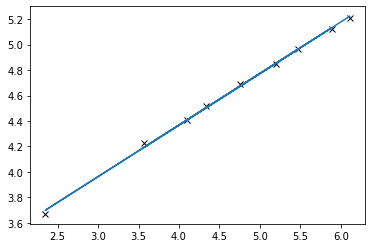

In [17]:
plt.plot(x, y, 'kx')
y2 = np.polyval(coeffs, x)
plt.plot(x, y2)
plt.show()

In [18]:
#Taking both x1, x2 for multivariable curve fit
import numpy as np
from scipy.optimize import curve_fit

def func(X, a, b):
    x1,x2 = X
    return a*x1 + 0.5*a*x2 + b

x1 = df2['x1']
x2 = df2['x2']
y = df2['y']

# initial guesses for a,b:
p0 = 8., 2.
coeffs, _ = (curve_fit(func, (x1,x2), y, p0))
print('x = ' , 1/coeffs[0])

x =  2.4633804706084583


In [19]:
#finding G using the constant term
x = 1/coeffs[0]
b = coeffs[1]
MG = (np.exp(2*x*b)*4*np.pi*np.pi)
print('G in terms of M = ', MG)

G in terms of M =  28848325.8573043


# So G = 28848325.857/M